In [1]:
!git clone https://github.com/aliaksandr960/segment-anything-eo.git

Cloning into 'segment-anything-eo'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 180 (delta 43), reused 133 (delta 13), pack-reused 0
Receiving objects: 100% (180/180), 27.95 MiB | 20.59 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [2]:
import os
os.chdir('/content/segment-anything-eo')

In [3]:
!pip install rasterio
!pip install geopandas

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 36.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 64.7 MB/s eta 0:00:00
--2023-04-24 11:25:23--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.65.39.117, 18.65.39.54, 18.65.39.115, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.65.39.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   2

In [25]:
!pip install segment-geospatial leafmap localtileserver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.6 MB/s eta 0:00:00


In [5]:
import cv2
import matplotlib.pyplot as plt
from sameo import SamEO
import leafmap

In [6]:
# Availble SamEO arguments:
# checkpoint="sam_vit_h_4b8939.pth",
# model_type='vit_h',
# device='cpu',
# erosion_kernel=(3, 3),
# mask_multiplier=255,
# sam_kwargs=None

# Availble sam_kwargs:
# points_per_side: Optional[int] = 32,
# points_per_batch: int = 64,
# pred_iou_thresh: float = 0.88,
# stability_score_thresh: float = 0.95,
# stability_score_offset: float = 1.0,
# box_nms_thresh: float = 0.7,
# crop_n_layers: int = 0,
# crop_nms_thresh: float = 0.7,
# crop_overlap_ratio: float = 512 / 1500,
# crop_n_points_downscale_factor: int = 1,
# point_grids: Optional[List[np.ndarray]] = None,
# min_mask_region_area: int = 0,
# output_mode: str = "binary_mask",

device = 'cuda:0'

sam_eo = SamEO(checkpoint="sam_vit_h_4b8939.pth",
               model_type='vit_h',
               device=device,
               erosion_kernel=(3, 3),
               mask_multiplier=255,
               sam_kwargs=None)

In [10]:
m = leafmap.Map(center=[20.579005850074182, 85.83967168453738], zoom=19)
m.add_basemap('SATELLITE')
m

Map(center=[20.579005850074182, 85.83967168453738], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [18]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    #bbox = [-95.3704, 29.6762, -95.368, 29.6775]
    print('Create a bounding box!')

In [28]:
from samgeo import tms_to_geotiff

In [48]:
bbox

[85.8395, 20.5781, 85.8408, 20.5792]

In [ ]:
tms_tiff_path = 'satellite.tif'
tms_to_geotiff(output=tms_tiff_path, bbox=bbox, zoom=20, source='Satellite')

tiff_image = cv2.cvtColor(cv2.imread(tms_tiff_path), cv2.COLOR_BGR2RGB)

In [32]:
pred_tiff_path = 'pred.tif'
sam_eo.tiff_to_tiff(tms_tiff_path, pred_tiff_path)

100%|██████████| 6/6 [00:49<00:00,  8.20s/it]


<Figure size 640x480 with 0 Axes>

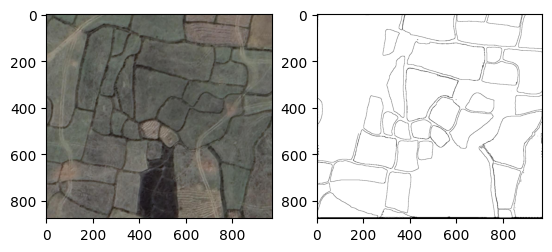

In [33]:
pred_image = cv2.cvtColor(cv2.imread(pred_tiff_path), cv2.COLOR_BGR2RGB)

plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(tiff_image)
axarr[1].imshow(pred_image)
plt.show()

In [35]:
# Adjust simplification tolerance to reduce size (it could be bigger, than raster)
sam_eo.tiff_to_gpkg(pred_tiff_path, 'pred.gpkg', simplify_tolerance=None)